In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data=pd.read_csv('data_gnre.csv')
data.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [6]:
data.isna().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [31]:
data.shape

(1000, 30)

In [32]:
df=data.drop(columns='filename',axis=1)

In [33]:
cat_col=[feature for feature in df.columns if df[feature].dtype=='O']
print(f'Categorical column: {cat_col}')

num_col=[feature for feature in df.columns if df[feature].dtype!='O']
print(f'Numerical column: {num_col}')

Categorical column: ['label']
Numerical column: ['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']


In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [36]:
le=LabelEncoder()
le_class=le.fit_transform(df['label'])

In [37]:
n_clusters = len(le.classes_)
n_clusters

10

In [38]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df[num_col])

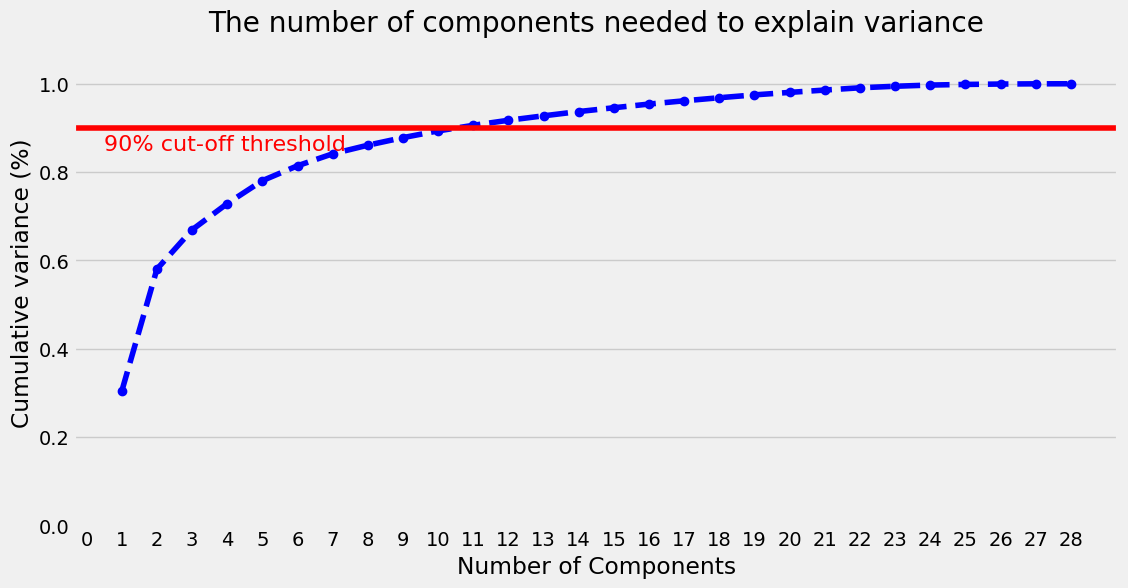

In [39]:
pca = PCA().fit(data_rescaled)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 29, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 29, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [40]:
num_pipeline=Pipeline(steps=[('scaling',MinMaxScaler()),
                            ('PCA',PCA(n_components=10, random_state=32))])
cat_pipeline=Pipeline(steps=[('encoder',OneHotEncoder())])

In [41]:
preprocessor=ColumnTransformer([('numerical_pipeline',num_pipeline,num_col),
                                ('categorical_pipeline',cat_pipeline,cat_col)])


In [42]:
clusterer=Pipeline(steps=[("kmeans",KMeans(n_clusters=n_clusters,init="k-means++", n_init=50,max_iter=500,
                                           random_state=32))])

In [43]:
pipe=Pipeline(steps=[("preprocessor",preprocessor),
                    ("clusterer",clusterer)])

In [44]:
pipe.fit(df)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler()),
                                                                  ('PCA',
                                                                   PCA(n_components=10,
                                                                       random_state=32))]),
                                                  ['tempo', 'beats',
                                                   'chroma_stft', 'rmse',
                                                   'spectral_centroid',
                                                   'spectral_bandwidth',
                                                   'rolloff',
                                                   'zero_crossing_rate',
                                                   'mfcc1', 'mfcc2', 'mfcc3',
                                                   'mfcc4', 'mfcc5', 'mfcc6',
                                                   'mfcc7', 'mfcc8', 'mfcc9',
                                                   'mfcc10', 'mfcc11', 'mfcc12',
                                                   'mfcc13', 'mfcc14', 'mfcc15',
                                                   'mfcc16', 'mfcc17', 'mfcc18',
                                                   'mfcc19', 'mfcc20']),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['label'])])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=10, n_init=50,
                                         random_state=32))]))])

In [46]:
preprocessed_data=pipe['preprocessor'].transform(df)

In [47]:
predicted_labels=pipe['clusterer']['kmeans'].labels_

In [55]:
pp=le.inverse_transform(predicted_labels)
pp=pd.DataFrame(pp)
pp.value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

In [48]:
silhouette_score(preprocessed_data, predicted_labels)

0.4761846617089301

In [23]:
adjusted_rand_score(le_class,predicted_labels)

1.0

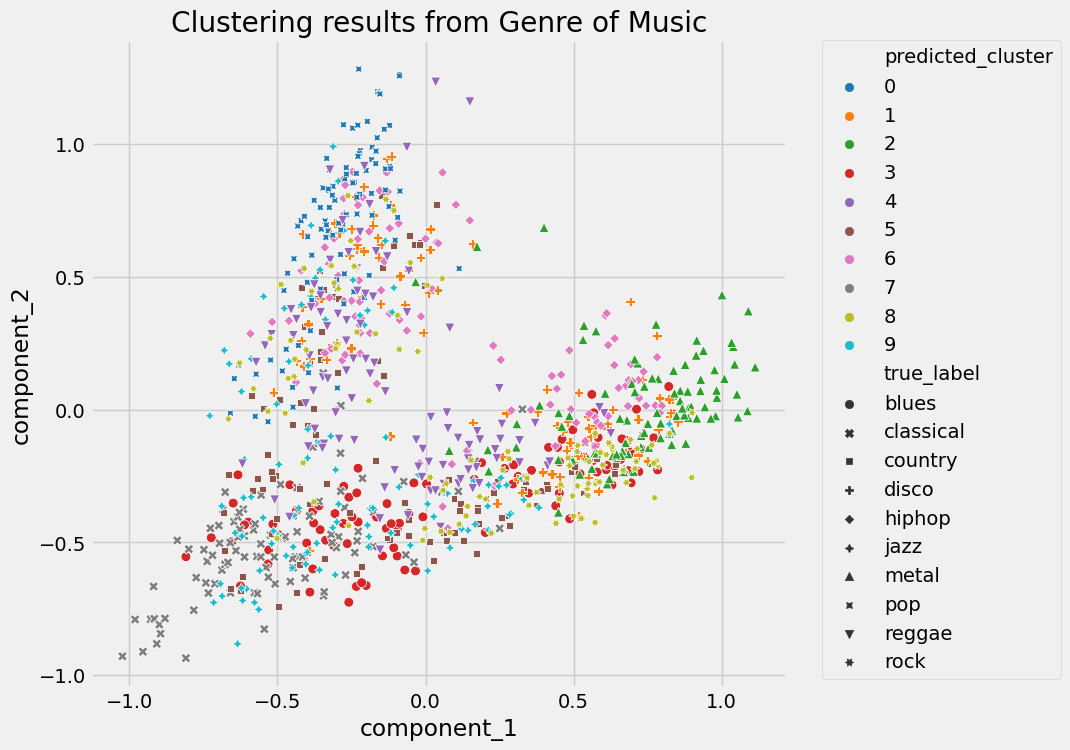

In [51]:
pcadf = pd.DataFrame(pipe["preprocessor"].transform(df),columns=["component_1", "component_2","component_3",
                                                                   "component_4", "component_5","component_6",
                                                                   "component_7", "component_8","component_9",
                                                                   "component_10", "component_11","component_12",
                                                                   "component_13", "component_14","component_15",
                                                                   "component_16", "component_17","component_18",
                                                                   "component_19", "component_20"
                                                                  ])
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = le.inverse_transform(le_class)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
scat = sns.scatterplot(x="component_1",y="component_2",s=50,data=pcadf,hue="predicted_cluster",style="true_label",palette="tab10")
scat.set_title("Clustering results from Genre of Music")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()